In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  9670k      0 --:--:--  0:01:33 --:--:-- 8233k


In [3]:
!gunzip SUSY.csv.gz

In [4]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 31 13:28 sample_data/
-rw-r--r-- 1 root root 2.3G Nov  1 20:08 SUSY.csv


In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [6]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 31 13:28 sample_data
-rw-r--r-- 1 root root 2.3G Nov  1 20:08 SUSY.csv


In [7]:
!wc -l SUSY.csv

5000000 SUSY.csv


In [8]:
!head -500000 SUSY.csv > SUSY-small.csv

In [9]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Oct 31 13:28 sample_data/
-rw-r--r-- 1 root root 2.3G Nov  1 20:08 SUSY.csv
-rw-r--r-- 1 root root 228M Nov  1 20:09 SUSY-small.csv


In [10]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


In [11]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

In [12]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [13]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [14]:
FeatureNames

['dPhi_r_b',
 'M_TR_2',
 'M_R',
 'M_Delta_R',
 'MT2',
 'MET_rel',
 'cos_theta_r1',
 'axial_MET',
 'R',
 'S_R']

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [17]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


In [18]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

l_1_pT


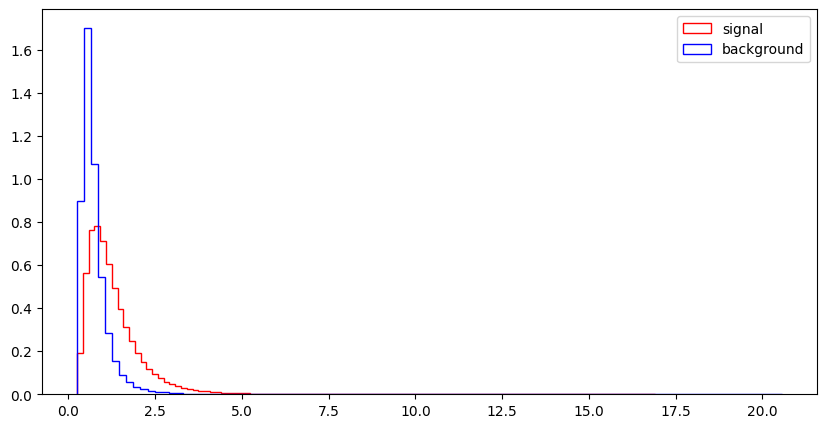

l_1_eta


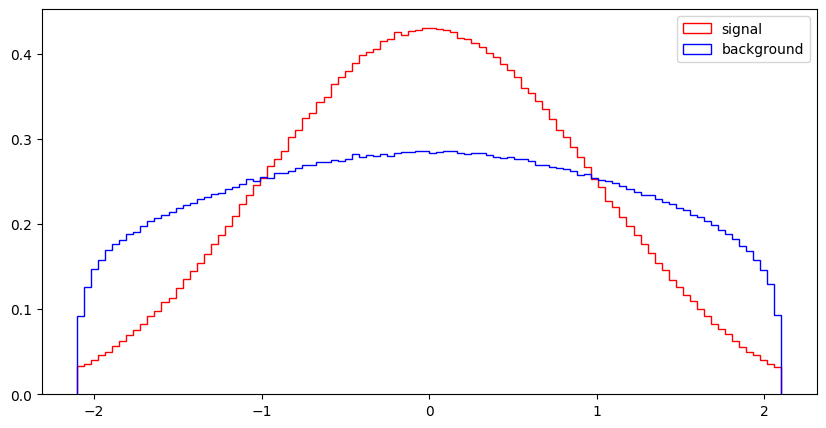

l_1_phi


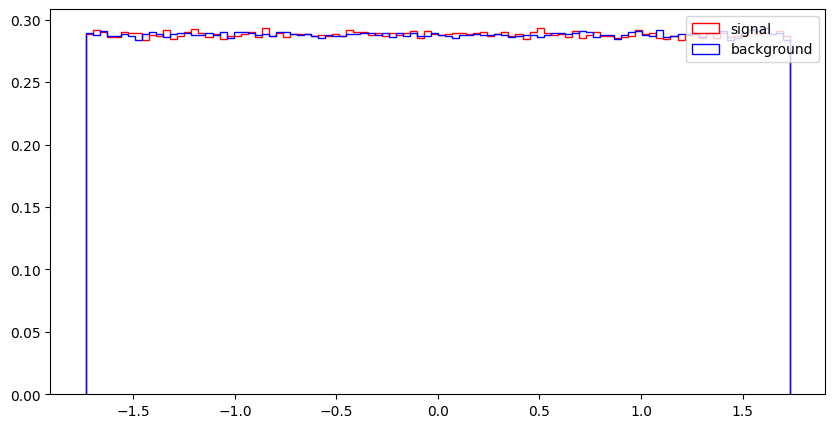

l_2_pT


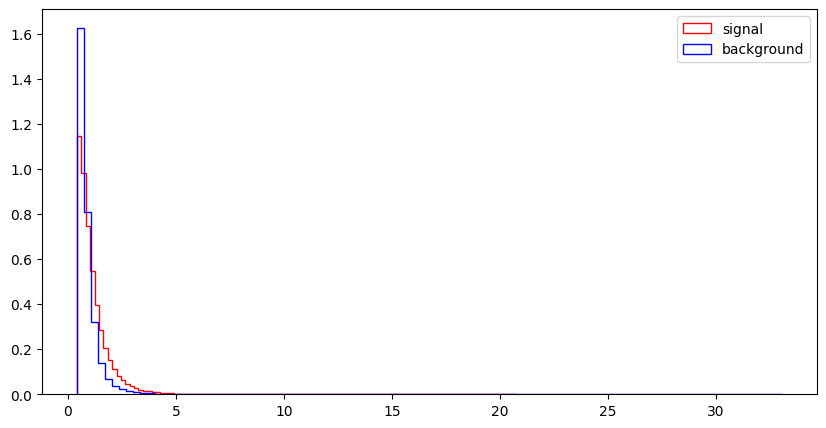

l_2_eta


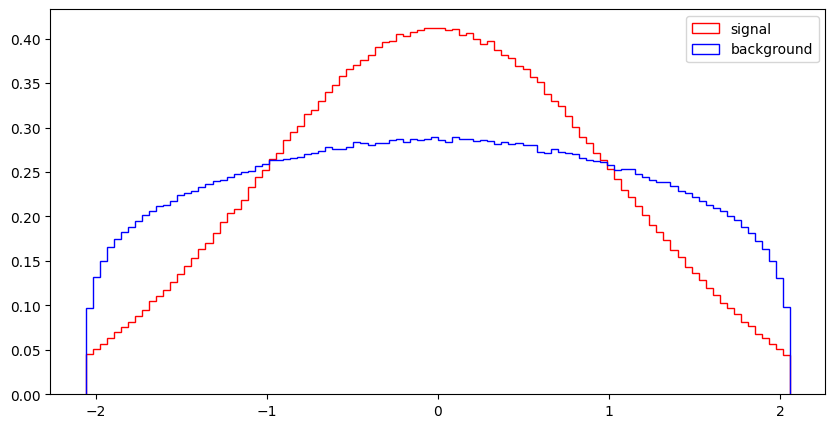

l_2_phi


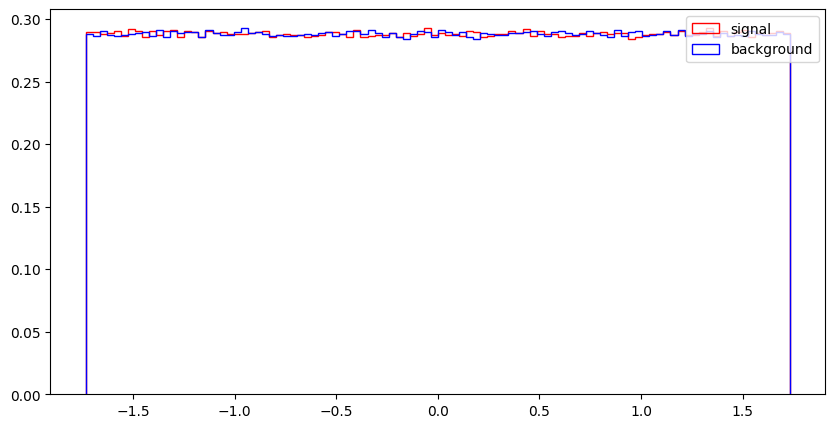

MET


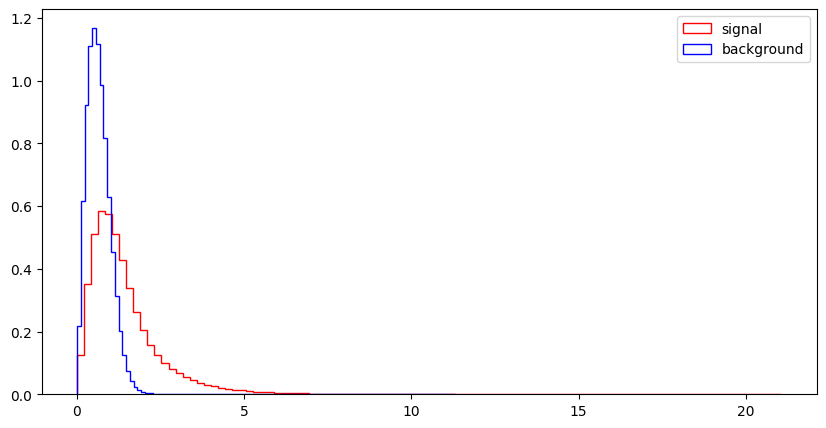

MET_phi


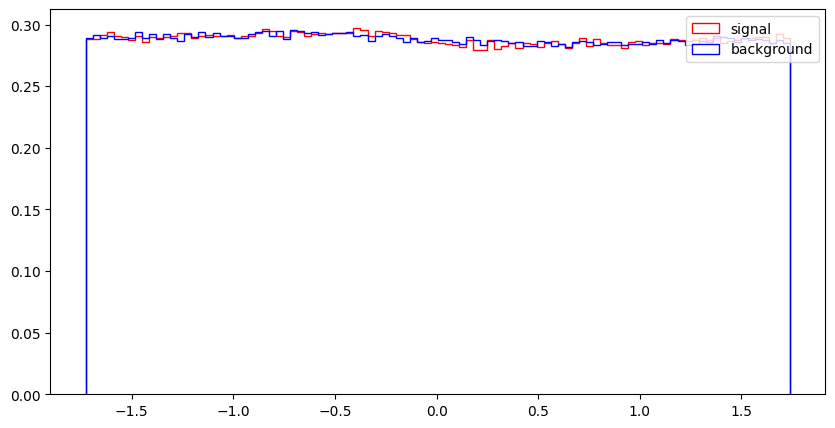

MET_rel


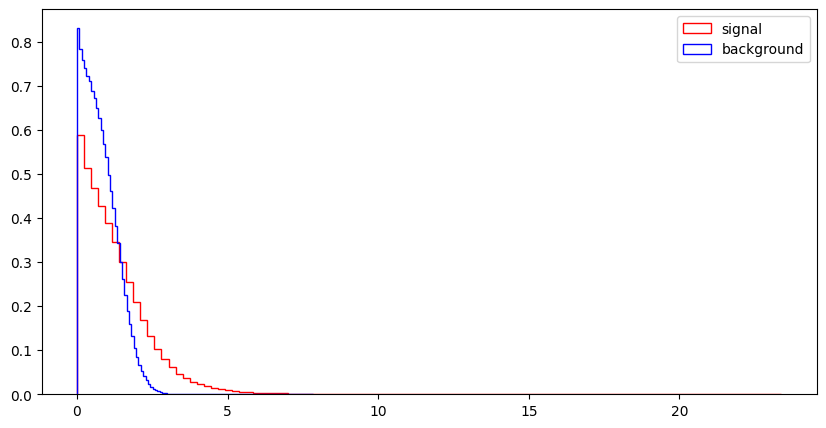

axial_MET


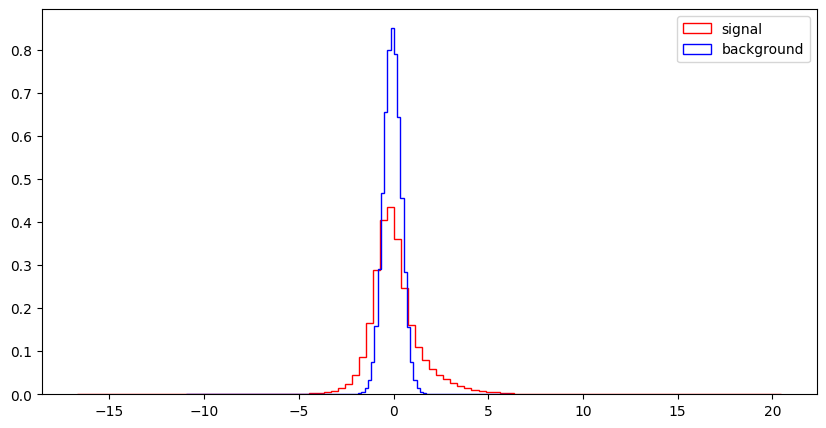

M_R


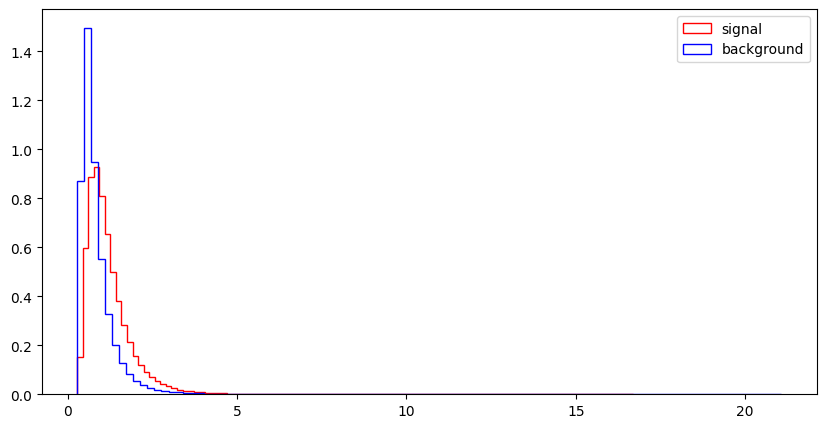

M_TR_2


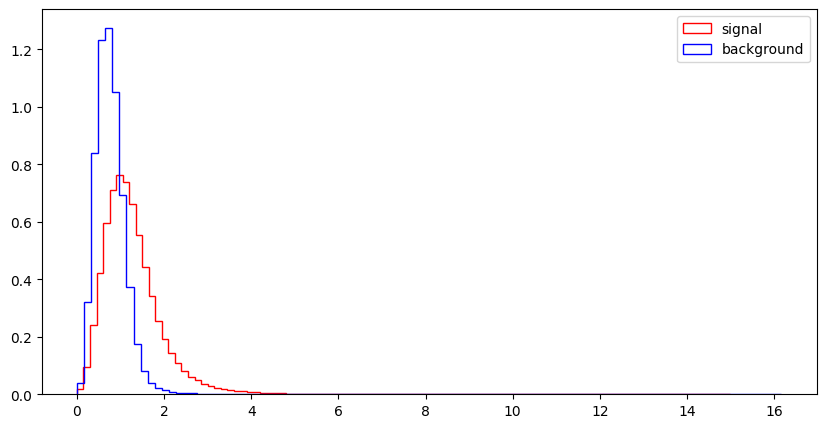

R


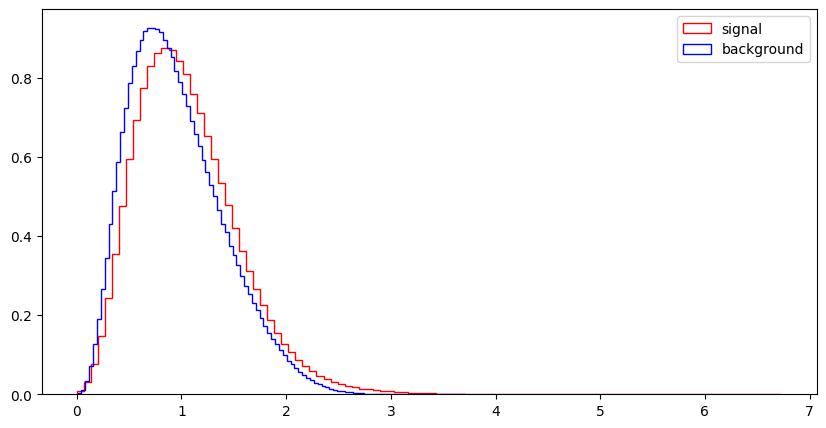

MT2


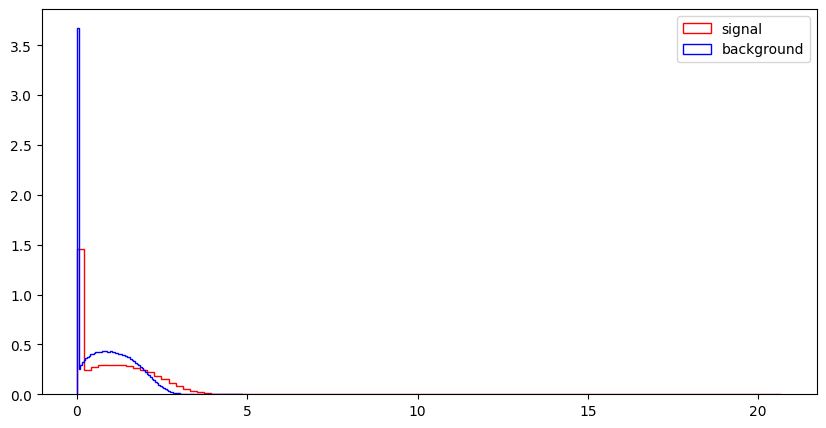

S_R


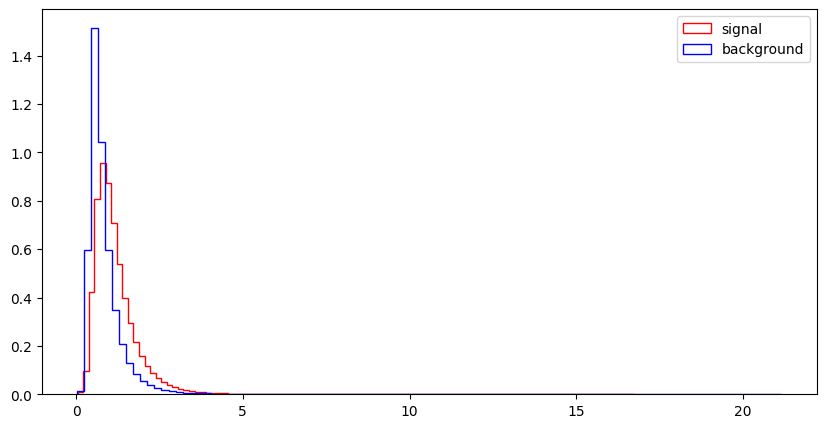

M_Delta_R


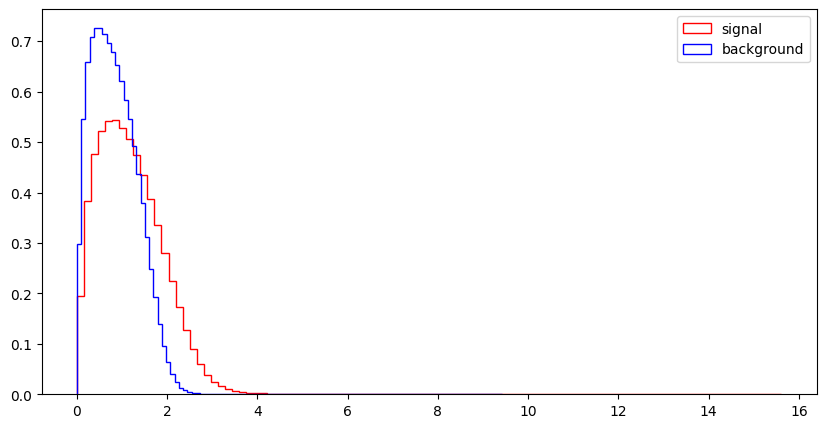

dPhi_r_b


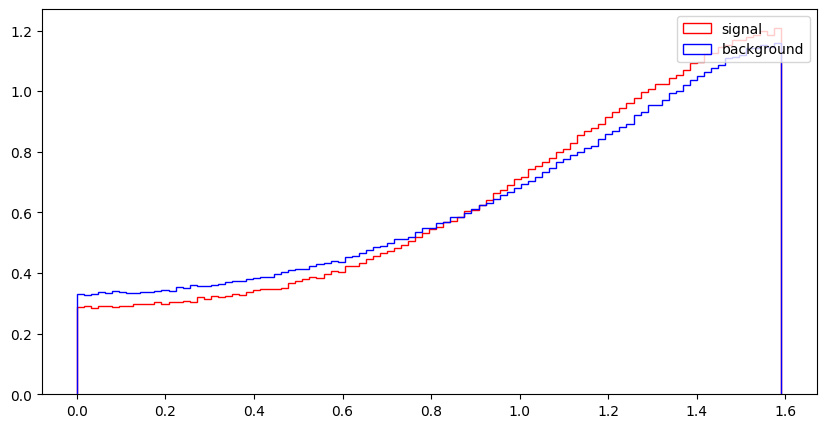

cos_theta_r1


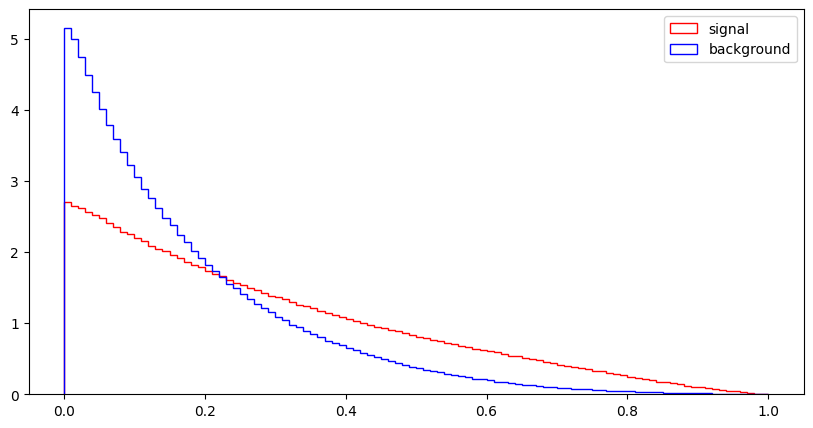

In [19]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

#Exercise 3

In [20]:
# Define column names for SUSY dataset
VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MET_rel"
]

# Load the dataset into a pandas DataFrame
filename = "SUSY-small.csv"  # Use the smaller dataset for faster processing
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [21]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check data types and basic info
print("\nDataset info:")
df.info()

# Display basic statistics of the dataset
print("\nBasic statistical summary:")
print(df.describe())


First few rows of the dataset:
   signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0     0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1     1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2     1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3     1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4     1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   

        MET   MET_phi  axial_MET       M_R    M_TR_2         R       MT2  \
0  0.567765 -0.175000   0.810061 -0.252552  1.921887  0.889637  0.410772   
1  3.475464 -1.219136   0.012955  3.775174  1.045977  0.568051  0.481928   
2  1.219918  0.504026   1.831248 -0.431385  0.526283  0.941514  1.587535   
3  2.033060  1.533041   3.046260 -1.005285  0.569386  1.015211  1.582217   
4  1.087562 -0.381742   0.589204  1.365479  1.179295  0.968218  0.728563   

        S_R  M_Delta_R  dPhi_r_b  cos_theta_r1   MET_rel  
0  1.145621   

In [22]:
# Count signal and background events
signal_count = df['signal'].value_counts()
print("\nCount of signal and background events:")
print(signal_count)


Count of signal and background events:
signal
0.0    270755
1.0    229245
Name: count, dtype: int64


#exercise 4.1 part *a*

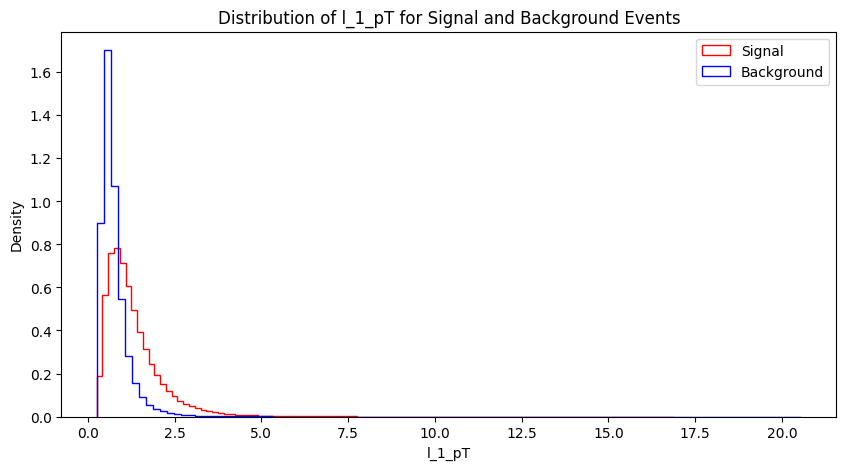

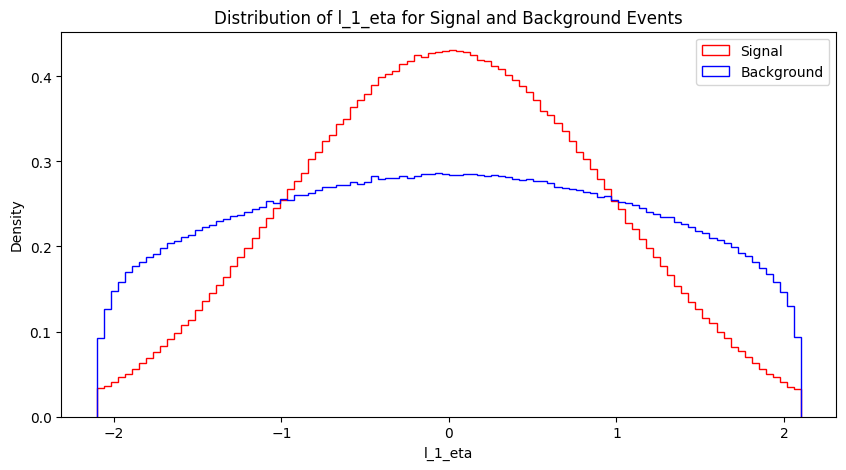

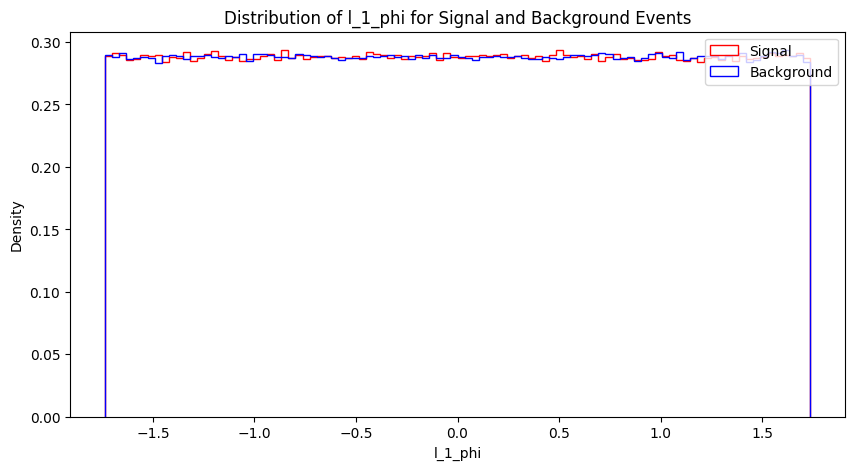

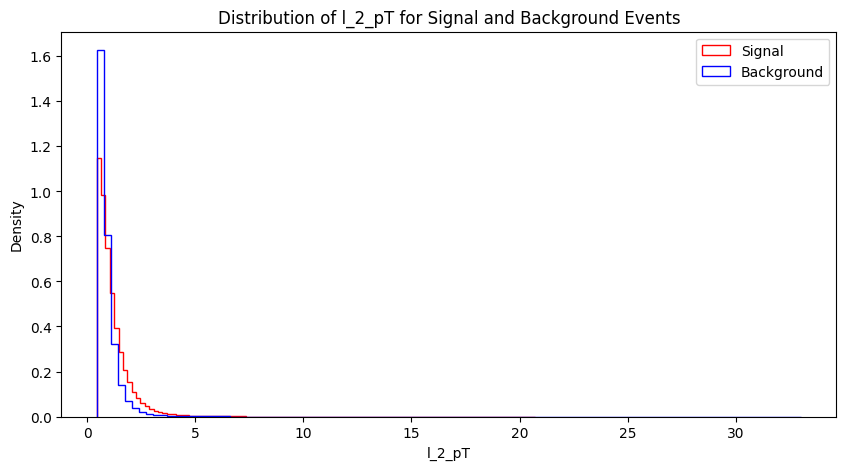

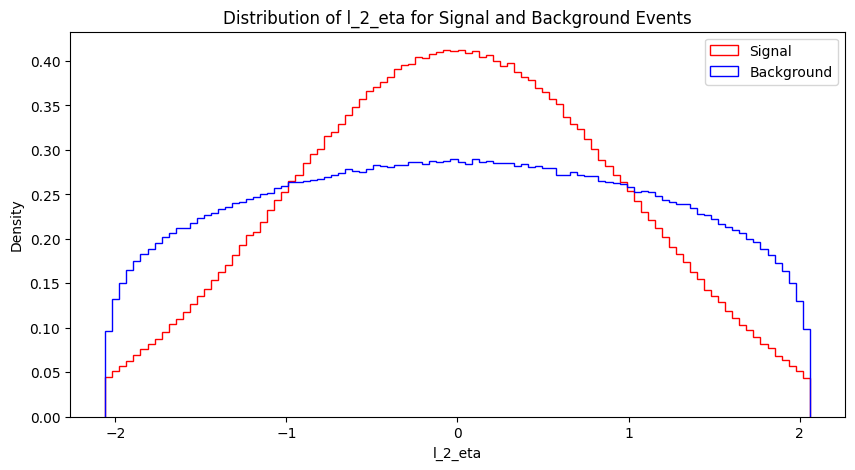

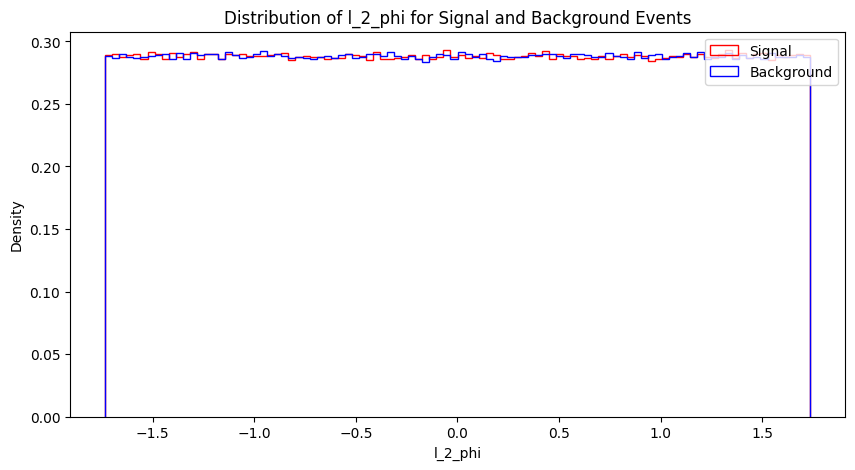

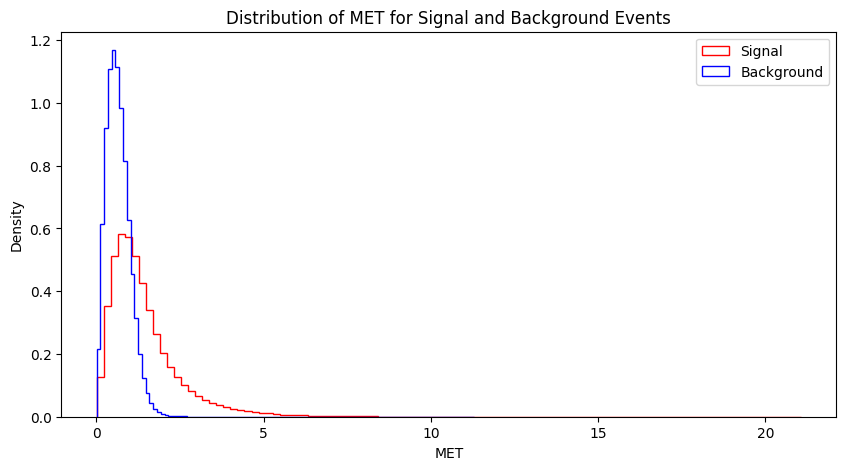

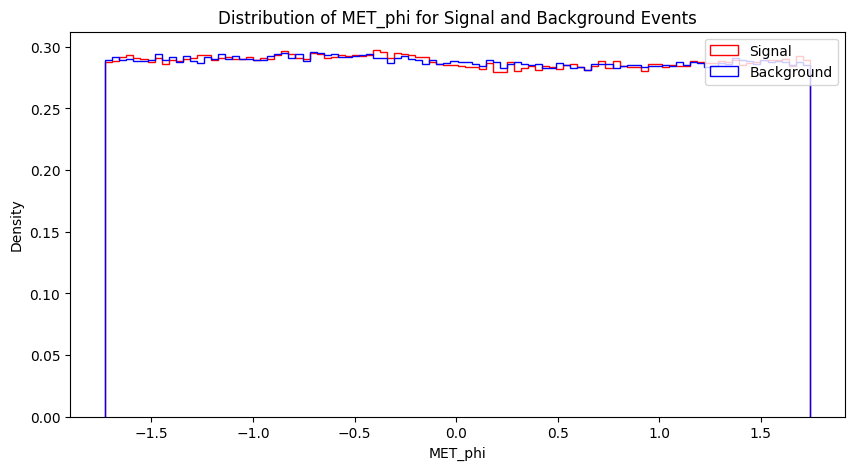

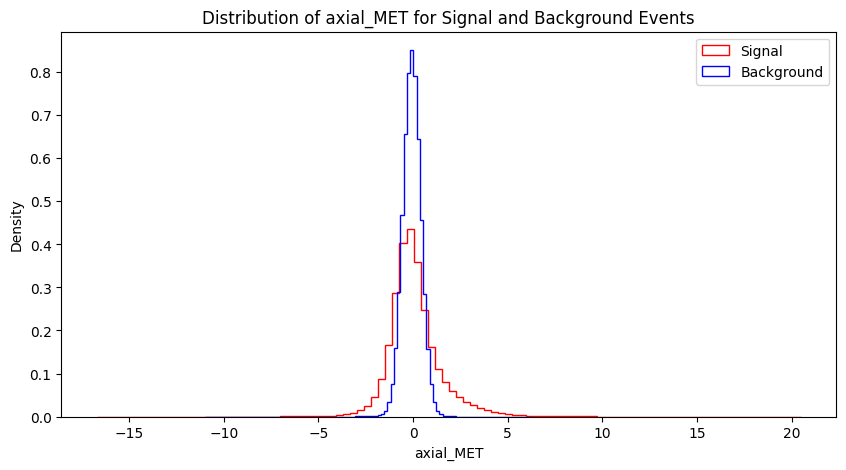

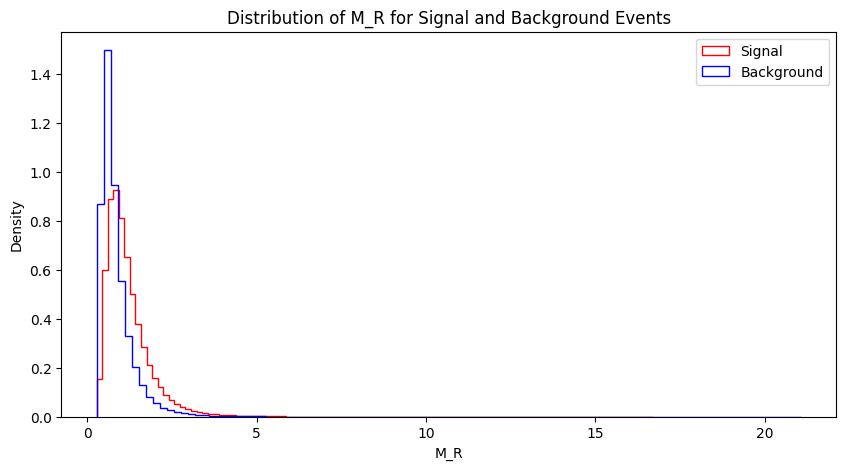

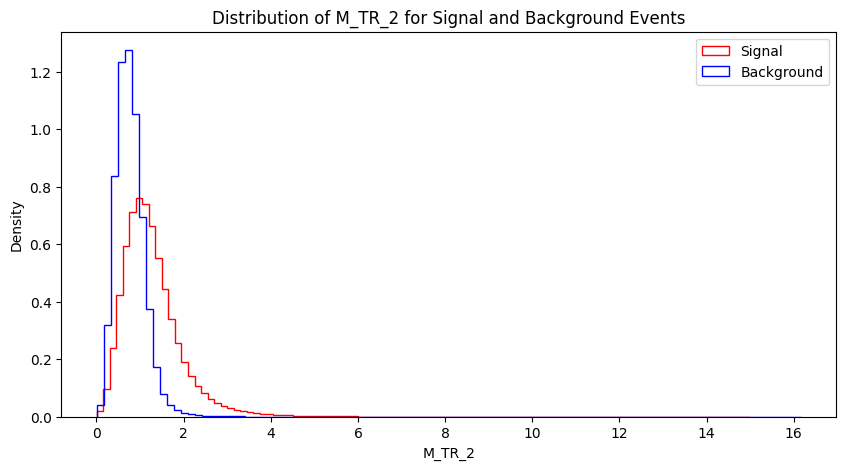

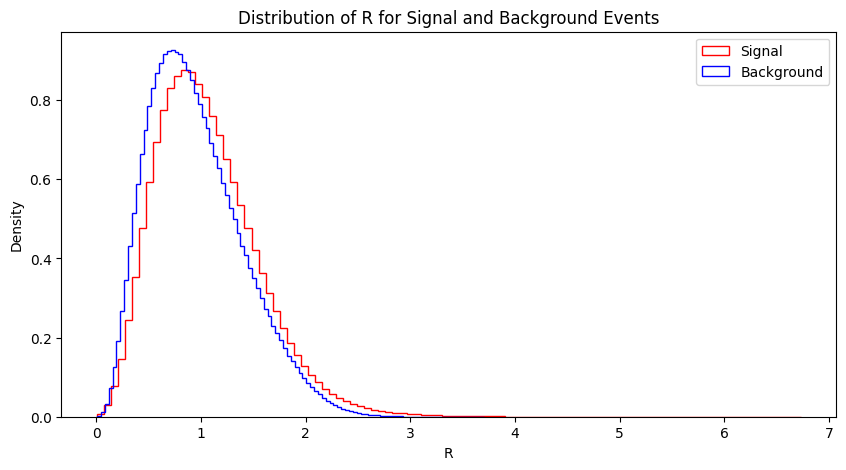

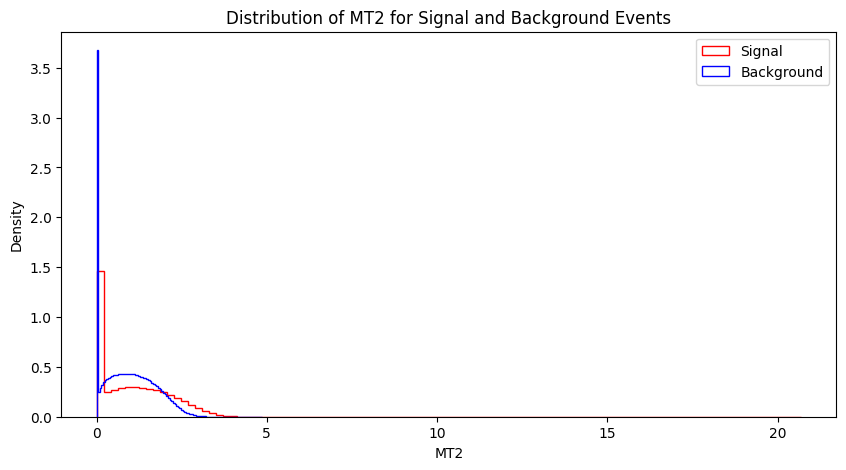

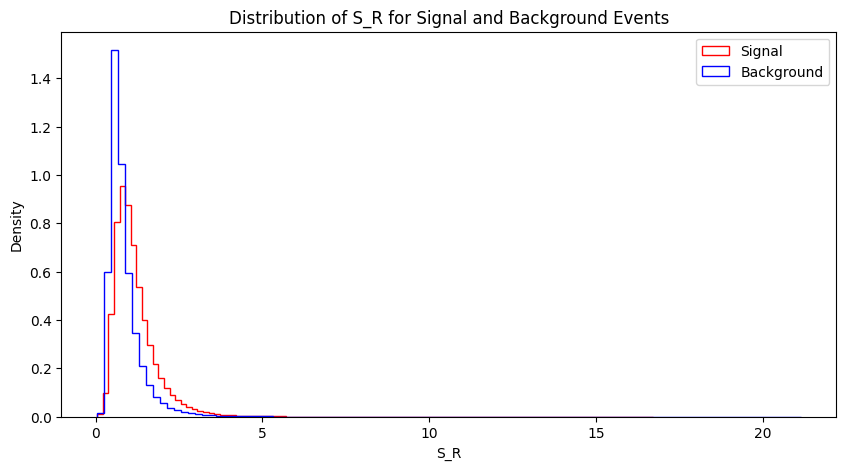

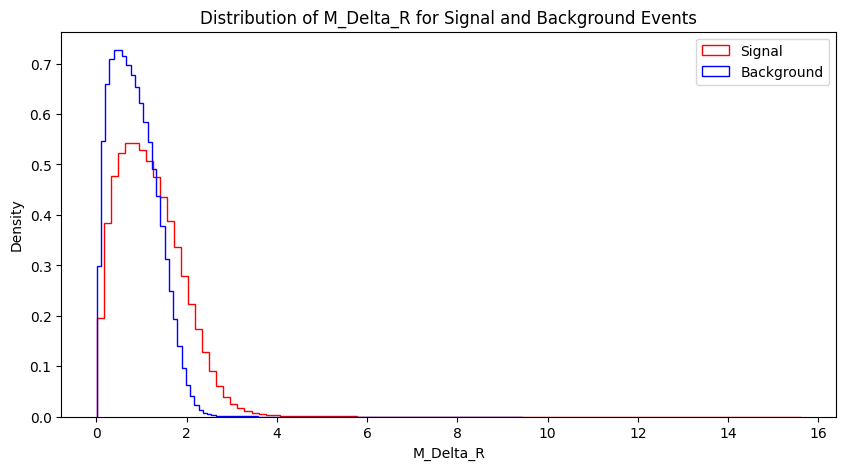

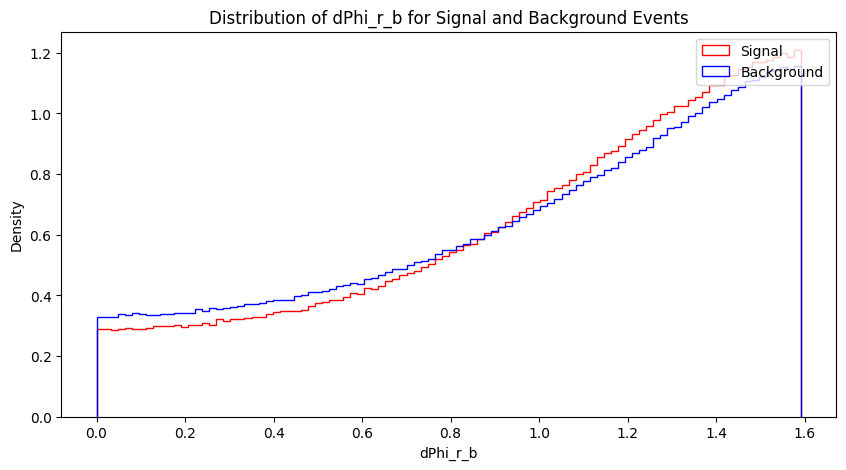

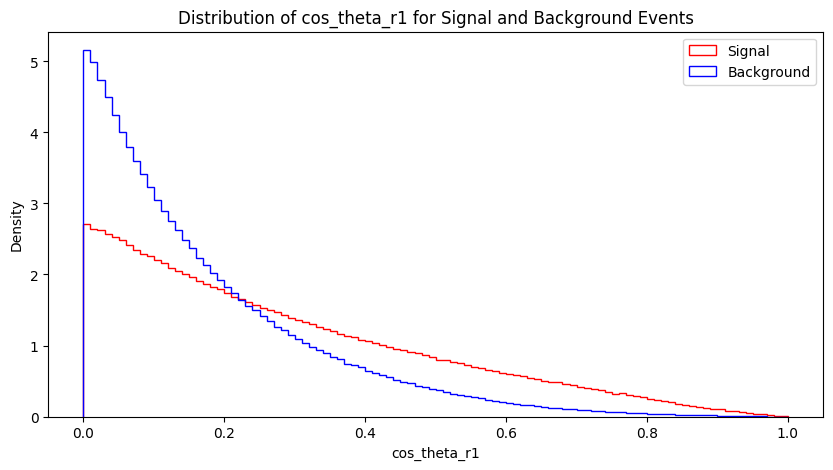

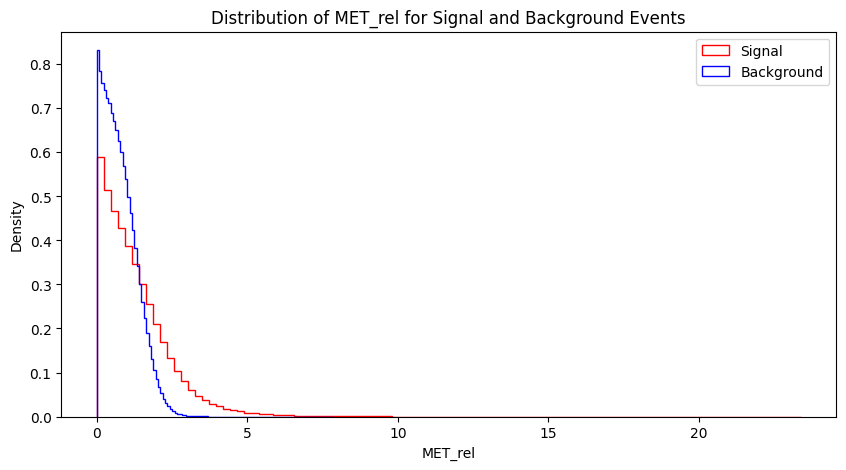

In [23]:
# Loop through each variable and plot histograms for signal and background
for var in VarNames[1:]:  # Skip the 'signal' column
    plt.figure(figsize=(10, 5))
    plt.hist(df_sig[var], bins=100, histtype="step", color="red", label="Signal", density=True)
    plt.hist(df_bkg[var], bins=100, histtype="step", color="blue", label="Background", density=True)
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of {var} for Signal and Background Events')
    plt.show()

#exercise 4.1 part *b*

In [24]:
# Split data based on the 'signal' column
df_sig = df[df['signal'] == 1]  # Signal events
df_bkg = df[df['signal'] == 0]  # Background events

In [25]:
# Calculate summary statistics for signal events
print("Summary Statistics for Signal Events:")
signal_stats = df_sig.describe()
print(signal_stats)

# Calculate summary statistics for background events
print("\nSummary Statistics for Background Events:")
background_stats = df_bkg.describe()
print(background_stats)

Summary Statistics for Signal Events:
         signal         l_1_pT        l_1_eta        l_1_phi         l_2_pT  \
count  229245.0  229245.000000  229245.000000  229245.000000  229245.000000   
mean        1.0       1.291078       0.000824      -0.001524       1.138668   
std         0.0       0.798660       0.866153       1.001750       0.742778   
min         1.0       0.256258      -2.102709      -1.734766       0.428599   
25%         1.0       0.752763      -0.621768      -0.866943       0.647776   
50%         1.0       1.087717       0.000992      -0.000516       0.919838   
75%         1.0       1.592187       0.621471       0.865386       1.373770   
max         1.0      12.620587       2.101378       1.734800      17.006506   

             l_2_eta        l_2_phi            MET        MET_phi  \
count  229245.000000  229245.000000  229245.000000  229245.000000   
mean        0.002487       0.000049       1.418381      -0.000470   
std         0.889928       1.002050       1

In [26]:
# Combine signal and background statistics into a single DataFrame for easy comparison
combined_stats = pd.concat([signal_stats, background_stats], axis=1, keys=['Signal', 'Background'])
print("\nCombined Summary Statistics (Signal vs. Background):")
print(combined_stats)


Combined Summary Statistics (Signal vs. Background):
         Signal                                                              \
         signal         l_1_pT        l_1_eta        l_1_phi         l_2_pT   
count  229245.0  229245.000000  229245.000000  229245.000000  229245.000000   
mean        1.0       1.291078       0.000824      -0.001524       1.138668   
std         0.0       0.798660       0.866153       1.001750       0.742778   
min         1.0       0.256258      -2.102709      -1.734766       0.428599   
25%         1.0       0.752763      -0.621768      -0.866943       0.647776   
50%         1.0       1.087717       0.000992      -0.000516       0.919838   
75%         1.0       1.592187       0.621471       0.865386       1.373770   
max         1.0      12.620587       2.101378       1.734800      17.006506   

                                                                   \
             l_2_eta        l_2_phi            MET        MET_phi   
count  229245.000

#exercise 4.1 part *c*

In [27]:
# Initialize a dictionary to store separation values for each feature
separation_values = {}

# Calculate separation for each variable (excluding 'signal' column)
for var in VarNames[1:]:
    mean_sig = df_sig[var].mean()
    mean_bkg = df_bkg[var].mean()
    std_sig = df_sig[var].std()
    std_bkg = df_bkg[var].std()

    # Separation formula
    separation = abs(mean_sig - mean_bkg) / np.sqrt((std_sig**2 + std_bkg**2) / 2)
    separation_values[var] = separation

# Convert the separation values into a DataFrame for easy viewing
separation_df = pd.DataFrame(list(separation_values.items()), columns=['Feature', 'Separation'])
print("\nSignal-to-Background Separation for Each Feature:")
print(separation_df.sort_values(by='Separation', ascending=False))



Signal-to-Background Separation for Each Feature:
         Feature  Separation
6            MET    0.948809
11             R    0.920642
0         l_1_pT    0.833484
8      axial_MET    0.577386
15      dPhi_r_b    0.564387
10        M_TR_2    0.559219
17       MET_rel    0.548681
14     M_Delta_R    0.540526
3         l_2_pT    0.397248
12           MT2    0.219557
13           S_R    0.158675
9            M_R    0.154042
16  cos_theta_r1    0.065939
4        l_2_eta    0.002886
7        MET_phi    0.001184
2        l_1_phi    0.000869
1        l_1_eta    0.000862
5        l_2_phi    0.000681


#exercise 4.1 part *c*

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Define features (X) and target (y)
X = df[VarNames[1:]]  # All columns except "signal"
y = df['signal']       # "signal" column as target

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize and train the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Performance:
Accuracy: 0.71516
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.73      0.74     54263
         1.0       0.69      0.69      0.69     45737

    accuracy                           0.72    100000
   macro avg       0.71      0.71      0.71    100000
weighted avg       0.72      0.72      0.72    100000

Confusion Matrix:
 [[39752 14511]
 [13973 31764]]


In [31]:
# Initialize and train the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classifier Performance:
Accuracy: 0.78865
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82     54263
         1.0       0.83      0.68      0.75     45737

    accuracy                           0.79    100000
   macro avg       0.80      0.78      0.78    100000
weighted avg       0.79      0.79      0.79    100000

Confusion Matrix:
 [[47761  6502]
 [14633 31104]]


In [32]:
print("\nModel Comparison:")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Model Comparison:
Decision Tree Accuracy: 0.71516
Logistic Regression Accuracy: 0.78865


#exercise 5

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load the dataset into a pandas DataFrame
VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MET_rel"
]
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Define features and target variable
X = df[VarNames[1:]]
y = df['signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a simpler model for faster training
logreg_model = LogisticRegression(max_iter=200, random_state=42)

# Define a smaller parameter grid for RandomizedSearchCV
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Regularization parameter
    'penalty': ['l2']            # Use only 'l2' regularization for logistic regression
}

# Use RandomizedSearchCV instead of GridSearchCV for faster search
random_search = RandomizedSearchCV(logreg_model, param_distributions=param_dist,
                                   n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters from Randomized Search:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Use the best estimator to predict on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Parameters from Randomized Search: {'penalty': 'l2', 'C': 0.01}
Best Cross-Validation Score: 0.7894375016286138

Optimized Logistic Regression Model Performance:
Accuracy: 0.78824
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.88      0.82     54263
         1.0       0.83      0.68      0.75     45737

    accuracy                           0.79    100000
   macro avg       0.80      0.78      0.78    100000
weighted avg       0.79      0.79      0.79    100000

Confusion Matrix:
 [[47865  6398]
 [14778 30959]]


#exercise 6

Model saved to decision_tree_model.joblib
Model loaded successfully.

Model Performance:
Accuracy: 0.71516
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.73      0.74     54263
         1.0       0.69      0.69      0.69     45737

    accuracy                           0.72    100000
   macro avg       0.71      0.71      0.71    100000
weighted avg       0.72      0.72      0.72    100000

Confusion Matrix:
 [[39752 14511]
 [13973 31764]]


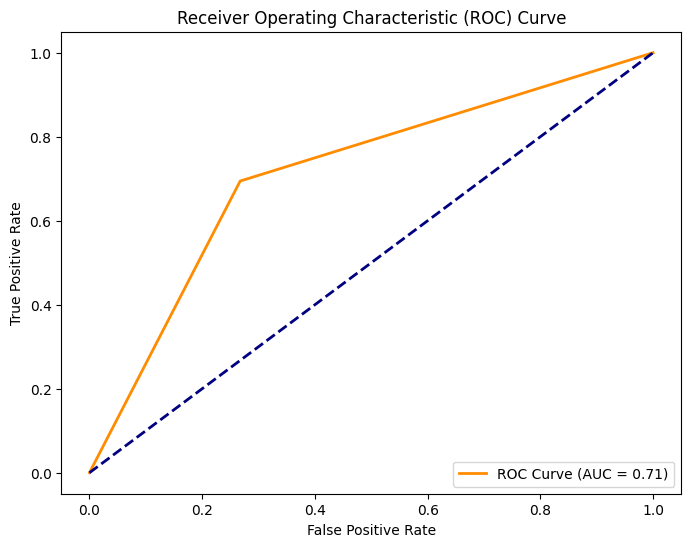

AUC Score: 0.71
Predictions on New Data:
[0. 0. 1. 1. 0.]


In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib  # For saving and loading models

# Define column names for SUSY dataset
VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MET_rel"
]

# Load the dataset into a pandas DataFrame
filename = "SUSY-small.csv"  # Ensure this file is in your working directory
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Define features (X) and target (y)
X = df[VarNames[1:]]  # All columns except "signal"
y = df['signal']       # "signal" column as target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
model_filename = "decision_tree_model.joblib"
joblib.dump(model, model_filename)
print(f"Model saved to {model_filename}")

# Load the model
loaded_model = joblib.load(model_filename)
print("Model loaded successfully.")

# Evaluate the model
y_pred = loaded_model.predict(X_test)
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Advanced Evaluation - ROC Curve and AUC
y_proba = loaded_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (signal)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.2f}")

# Example of new data (replace this with actual new data if available)
new_data = X_test.sample(5, random_state=42)  # Sample 5 rows from X_test as new data
new_predictions = loaded_model.predict(new_data)  # Make predictions on new data

# Print predictions
print("Predictions on New Data:")
print(new_predictions)


#exercise 7

Best Parameters from Randomized Search: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Best Cross-Validation Score: 0.7883125021535985

Optimized Decision Tree Model Performance:
Accuracy: 0.78866
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.86      0.82     54263
         1.0       0.81      0.70      0.75     45737

    accuracy                           0.79    100000
   macro avg       0.79      0.78      0.78    100000
weighted avg       0.79      0.79      0.79    100000

Confusion Matrix:
 [[46705  7558]
 [13576 32161]]


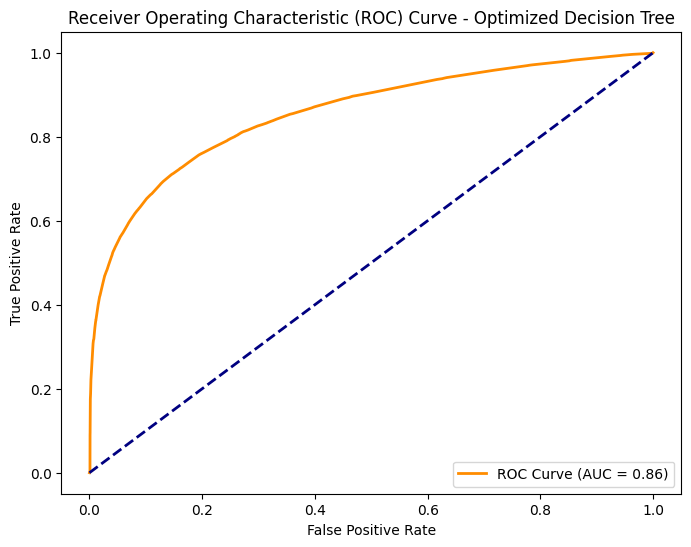

AUC Score for Optimized Decision Tree: 0.86


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset into a pandas DataFrame
VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MET_rel"
]
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Define features and target variable
X = df[VarNames[1:]]
y = df['signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a simple model (Decision Tree for fast training)
dt_model = DecisionTreeClassifier(random_state=42)

# Define a small parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use RandomizedSearchCV instead of GridSearchCV for faster search
random_search = RandomizedSearchCV(dt_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters from Randomized Search:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

# Use the best estimator to predict on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the optimized model
print("\nOptimized Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot ROC curve for the optimized model
y_proba = best_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (signal)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Optimized Decision Tree')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score for Optimized Decision Tree: {roc_auc:.2f}")


Final model saved to final_random_forest_model.joblib
Final model loaded successfully.

Final Model Performance:
Accuracy: 0.79513
Classification Report:
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82     54263
         1.0       0.83      0.70      0.76     45737

    accuracy                           0.80    100000
   macro avg       0.80      0.79      0.79    100000
weighted avg       0.80      0.80      0.79    100000

Confusion Matrix:
 [[47650  6613]
 [13874 31863]]


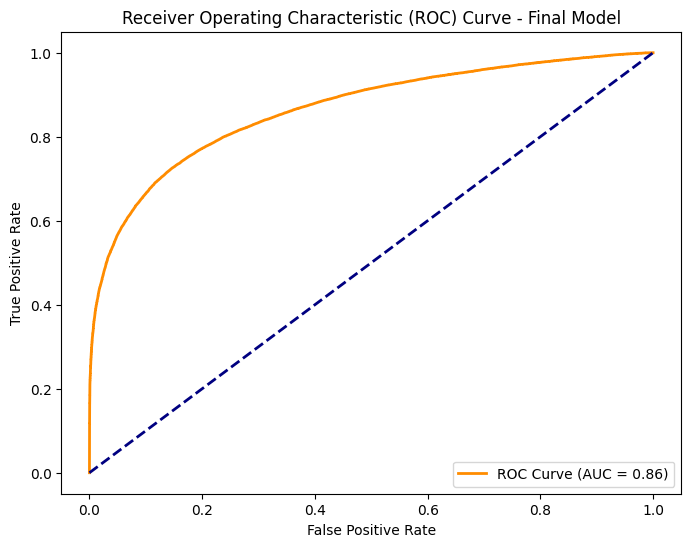

AUC Score for Final Model: 0.86

Predictions on New Data Sample:
[0. 0. 0. 0. 1.]
Probabilities of being Signal (class 1):
[0.12705673 0.26490505 0.40086528 0.37562725 0.88612752]


In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import joblib  # For saving and loading models

# Load and prepare the dataset
VarNames = [
    "signal", "l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
    "MET", "MET_phi", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R",
    "M_Delta_R", "dPhi_r_b", "cos_theta_r1", "MET_rel"
]
filename = "SUSY-small.csv"  # Ensure this file is in your working directory
df = pd.read_csv(filename, dtype='float64', names=VarNames)

# Define features and target
X = df[VarNames[1:]]
y = df['signal']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the final model
final_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
final_model.fit(X_train, y_train)

# Save the final model
model_filename = "final_random_forest_model.joblib"
joblib.dump(final_model, model_filename)
print(f"Final model saved to {model_filename}")

# Load the final model
loaded_model = joblib.load(model_filename)
print("Final model loaded successfully.")

# Evaluate the model on test data
y_pred = loaded_model.predict(X_test)
print("\nFinal Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot ROC Curve for the final model
y_proba = loaded_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (signal)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Final Model')
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score for Final Model: {roc_auc:.2f}")

# Define a prediction pipeline function for new data
def prediction_pipeline(new_data):
    """
    Takes in a new dataset and applies the trained model to make predictions.
    Assumes `new_data` is a DataFrame with the same features as the training data.
    """
    # Load the model
    model = joblib.load(model_filename)

    # Make predictions
    predictions = model.predict(new_data)
    probabilities = model.predict_proba(new_data)[:, 1]  # Probability of signal

    # Return predictions and probabilities
    return predictions, probabilities

# Example usage of the prediction pipeline with new data
# Here we take a sample from X_test as a placeholder for new data
new_data_sample = X_test.sample(5, random_state=42)  # Sample 5 rows from X_test

# Get predictions and probabilities
predictions, probabilities = prediction_pipeline(new_data_sample)

# Display predictions
print("\nPredictions on New Data Sample:")
print(predictions)
print("Probabilities of being Signal (class 1):")
print(probabilities)